# Problem Statement
<!-- Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

Do ETL : Extract-Transform-Load some Amazon dataset and find for me Sales-trend -> month wise , year wise , yearly_month wise -->


Problem Statement
Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

Do ETL : Extract-Transform-Load some Amazon dataset and find for me Sales-trend -> month wise , year wise , yearly_month wise

In [294]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
# Importing Data set

sales_data=pd.read_csv("Downloads\\Amazon_Sales.csv")


In [296]:
# Checking the records in the dataset by using head command
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [297]:
#Describe the different data types and if there is any NAN values in the given dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


# Data Cleaning and Manipulation

In [298]:
# Dropping column Order Id

sales_data.drop(['Order ID'],axis = 1, inplace = True )

In [299]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [300]:
# Checking size if the Order Id column has been deleted or not
sales_data.shape

(100, 13)

In [301]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])

In [302]:
#Checking data
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [303]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Ship Date       100 non-null    datetime64[ns]
 7   Units Sold      100 non-null    int64         
 8   Unit Price      100 non-null    float64       
 9   Unit Cost       100 non-null    float64       
 10  Total Revenue   100 non-null    float64       
 11  Total Cost      100 non-null    float64       
 12  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 10.3+ KB


In [304]:
#We will create new features from these ship day name & Shipping duration 
# Create 'Shipping duration' column using np.timedelta64(1,'D')
sales_data['Shipping duration'] = (sales_data['Ship Date'] - sales_data['Order Date'])/np.timedelta64(1,'D')

# create 'Ship day' column using 'Ship Date' column using day_name()
sales_data['Ship day'] = sales_data['Ship Date'].dt.day_name()


In [305]:
#Checking records
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Region             100 non-null    object        
 1   Country            100 non-null    object        
 2   Item Type          100 non-null    object        
 3   Sales Channel      100 non-null    object        
 4   Order Priority     100 non-null    object        
 5   Order Date         100 non-null    datetime64[ns]
 6   Ship Date          100 non-null    datetime64[ns]
 7   Units Sold         100 non-null    int64         
 8   Unit Price         100 non-null    float64       
 9   Unit Cost          100 non-null    float64       
 10  Total Revenue      100 non-null    float64       
 11  Total Cost         100 non-null    float64       
 12  Total Profit       100 non-null    float64       
 13  Shipping duration  100 non-null    float64       
 14  Ship day   

In [306]:
# Checking missing values for each column - use .isnull().sum
sales_data.isnull().sum()

Region               0
Country              0
Item Type            0
Sales Channel        0
Order Priority       0
Order Date           0
Ship Date            0
Units Sold           0
Unit Price           0
Unit Cost            0
Total Revenue        0
Total Cost           0
Total Profit         0
Shipping duration    0
Ship day             0
dtype: int64

From the table we observe that we have no missing values

In [307]:
#We have 'Order Priority' column given in terms of letters H, C, L, M
#Assuming H - High, C - Critical, L - Low, M- Medium priorities changing it to understand data
# defining a function for this

def ord_pri(x):
    if x=='H':
        return 'High'
    elif x=='C':
        return 'Critical'
    elif x=='L':
        return 'Low'
    elif x=='M':
        return 'Medium'


In [308]:
# use .apply to the order priority column to apply the function created
    
sales_data['Order Priority'] = sales_data['Order Priority'].apply(ord_pri)


In [309]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration,Ship day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30.0,Sunday
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24.0,Saturday
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6.0,Thursday
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15.0,Saturday
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5.0,Wednesday


In [310]:
# saving it as new file, cleaned csv file in the same folder

sales_data.to_csv("Downloads\\Amazon_New_Sales.csv",index = False)

# Data Analysis & Visualisation

In [311]:
sales_data=pd.read_csv("Downloads\\Amazon_New_Sales.csv")

In [312]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration,Ship day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30.0,Sunday
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24.0,Saturday
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6.0,Thursday
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15.0,Saturday
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5.0,Wednesday


In [313]:
#According to given problem statement we need to find out the Sales-trend -> month wise , year wise , yearly_month wise
#find key metrics and factors and to show the meaningful relationships between attributes

#Univariate Analysis


#### CONTINUOUS VARIABLE DISTRIBUTION

In [314]:
#Unit Price ,Unit Cost, Total Revenue ,Total Cost , Total Profit , Unit Price , Units Sold , Shipping duration can be measured
continuous_var = ['Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit','Unit Price','Units Sold', 'Shipping duration']

In [315]:
sales_data[continuous_var].head()

,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Price,Units Sold,Shipping duration
0,255.28,159.42,2533654.00,1582243.50,951410.50,255.28,9925,30.0
1,205.70,117.11,576782.80,328376.44,248406.36,205.70,2804,24.0
2,651.21,524.96,1158502.59,933903.84,224598.75,651.21,1779,6.0
3,9.33,6.92,75591.66,56065.84,19525.82,9.33,8102,15.0
4,651.21,524.96,3296425.02,2657347.52,639077.50,651.21,5062,5.0


In [316]:
#For statistical value
sales_data[continuous_var].describe()

,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unit Price,Units Sold,Shipping duration
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,276.761300,5128.710000,23.360000
std,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,235.592241,2794.484562,14.742586
min,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,9.330000,124.000000,0.000000
25%,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,81.730000,2836.250000,9.750000
50%,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,179.880000,5382.500000,23.500000
75%,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,437.200000,7369.000000,36.250000
max,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,668.270000,9925.000000,50.000000


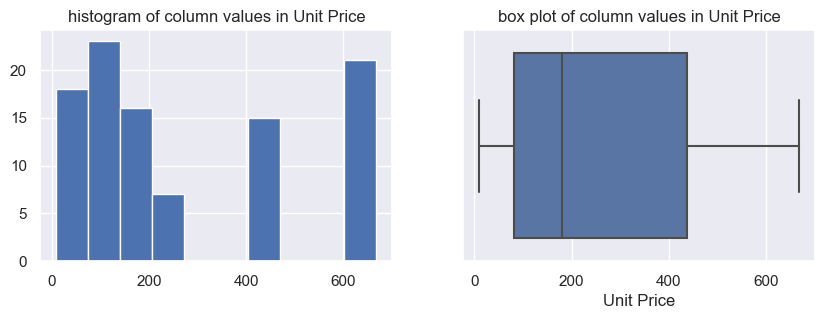

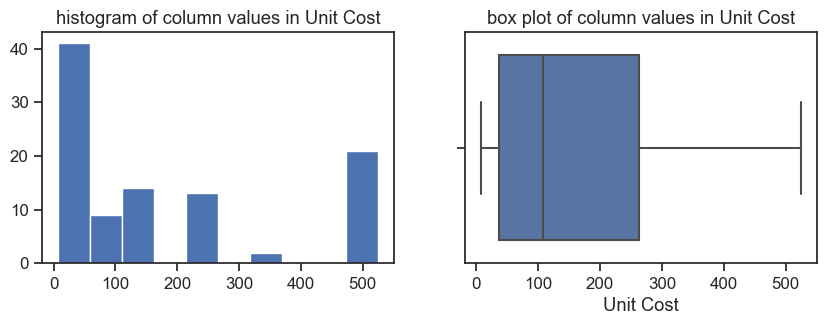

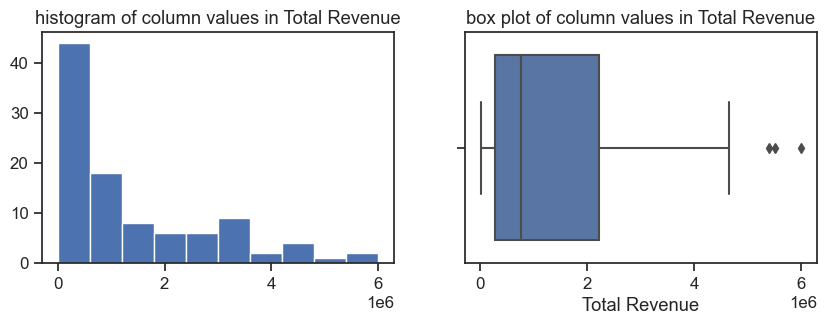

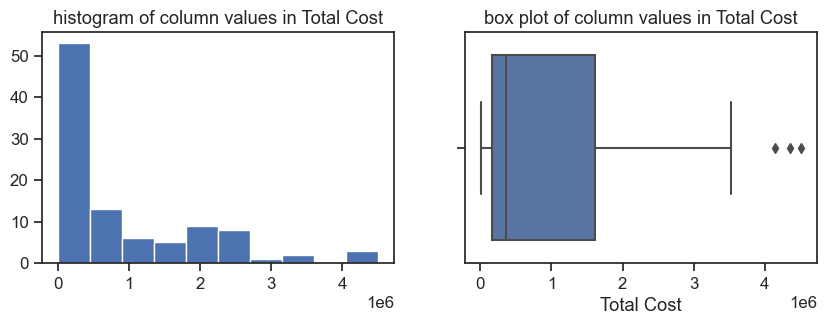

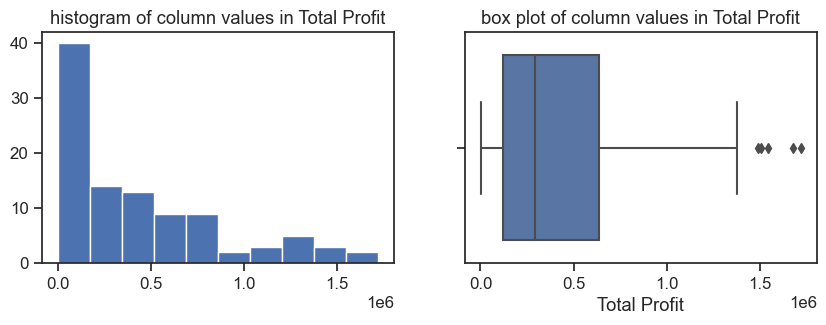

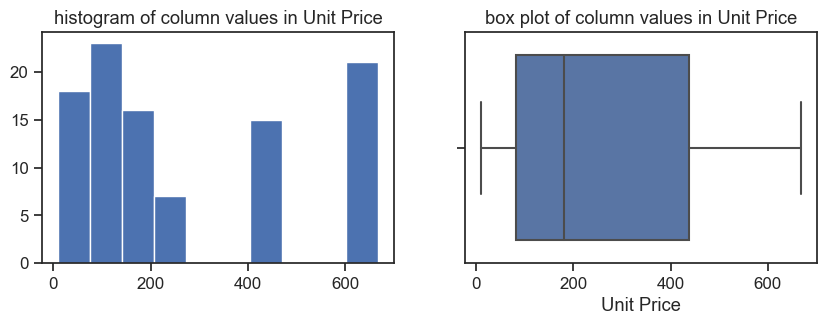

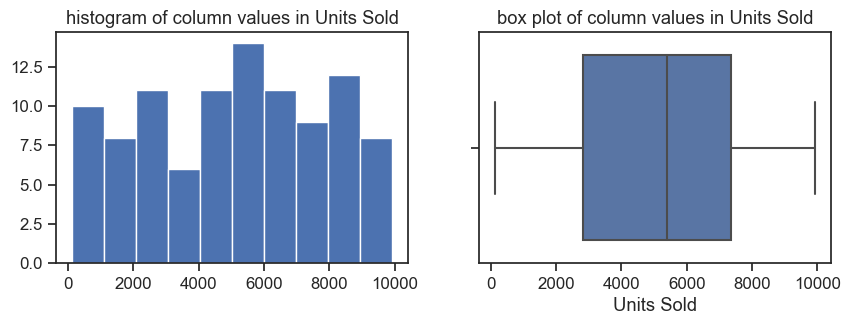

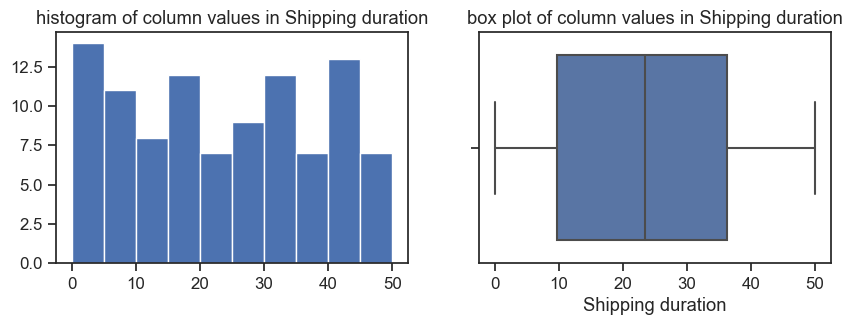

In [317]:
# for loop for continuous_columns variable
# Plotting all the variables at once so as to compare
for feature in continuous_var:
    import warnings  #to ignore warnings
    warnings.filterwarnings('ignore')
 # We created two variables, plot and ax
    plot,ax = plt.subplots(1,2,figsize=(10,3))

    ax[0].hist(sales_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(sales_data[feature],ax=ax[1])
# using ax.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
# seaborn style setting
    sns.set(style='ticks', palette='deep', font_scale=1.1)
# matplotlib command for displaying plots
    plt.show()

#### CATEGORICAL VARIABLE DISTRIBUTION

In [318]:
#Following columns are categorical in nature:Order Date , Ship Date , Ship day name , Region , Country , Item Type , Sales Channel
categorial_var = ['Order Date', 'Ship Date','Ship day name','Region','Country','Item Type','Sales Channel']

In [319]:
#To know records of sales channel
sales_data['Sales Channel'].value_counts()
# Both channels are equally used

Offline    50
Online     50
Name: Sales Channel, dtype: int64

In [320]:
# Finding the counts of different item types by creating a data frame 

Items = sales_data['Item Type'].value_counts().reset_index()

Items


,index,Item Type
0,Clothes,13
1,Cosmetics,13
2,Office Supplies,12
3,Fruits,10
4,Personal Care,10
5,Household,9
6,Beverages,8
7,Baby Food,7
8,Cereal,7
9,Vegetables,6


In [321]:
#count% for comparison - create count_percent col

Items['Count_Percentage'] = (Items['Item Type']/sales_data.shape[0])*100

# print the data frame
Items

,index,Item Type,Count_Percentage
0,Clothes,13,13.0
1,Cosmetics,13,13.0
2,Office Supplies,12,12.0
3,Fruits,10,10.0
4,Personal Care,10,10.0
5,Household,9,9.0
6,Beverages,8,8.0
7,Baby Food,7,7.0
8,Cereal,7,7.0
9,Vegetables,6,6.0


# 

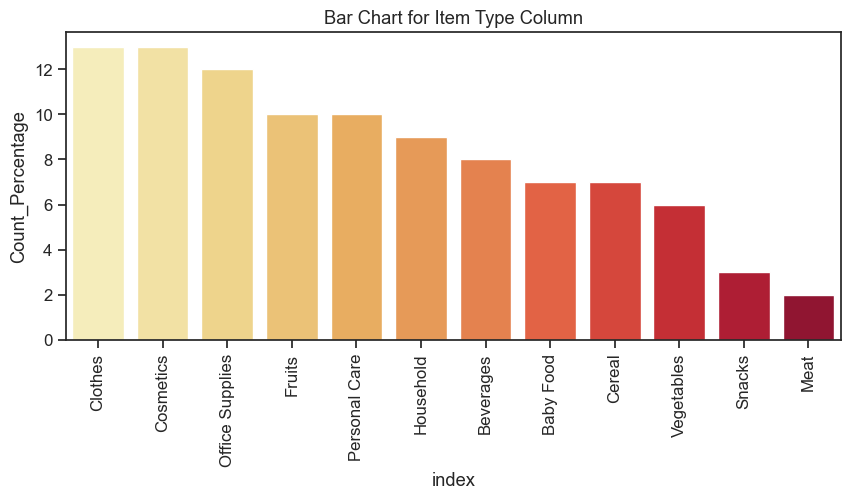

In [322]:
# first step is to create plot, ax object using plt.subplots (creating environment for graph plot)

plot1,ax = plt.subplots(figsize=(10,4))

#  plotting the bar graph with index x & y 

sns.barplot(x = 'index', y = 'Count_Percentage', data = Items, ax = ax,palette='YlOrRd') 

plt.xticks(rotation=90)  # to change index vertically

ax.set_title('Bar Chart for Item Type Column')   # changing the title of graph

#  set up seaborn style setting

sns.set()

# use plt.show() for showing the plots

plt.show()

In [323]:
##From above graph it can be seen that most of the categories land on clothes , cosmetics and office supplies are bought

In [324]:
# counts of different regions

Country_counts = sales_data['Region'].value_counts().reset_index()

# print the dataframe formed

Country_counts

,index,Region
0,Sub-Saharan Africa,36
1,Europe,22
2,Australia and Oceania,11
3,Asia,11
4,Middle East and North Africa,10
5,Central America and the Caribbean,7
6,North America,3


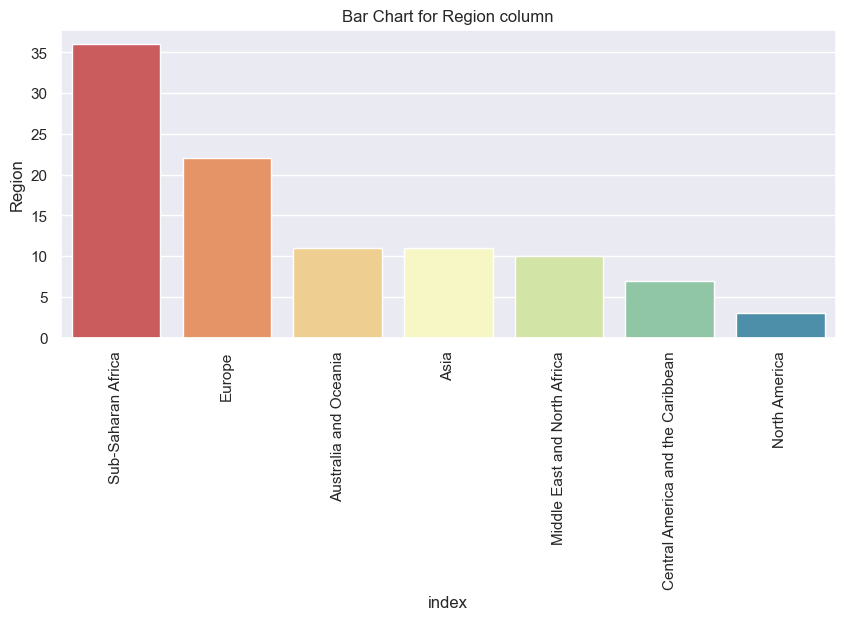

In [325]:
#  create plot, ax object using plt.subplots 

plot2,ax = plt.subplots(figsize=(10,4))

#  sns.barplot for plotting bar graphs

sns.barplot(x = 'index', y = 'Region', data = Country_counts, ax = ax , palette= 'Spectral')
plt.xticks(rotation=90)

#  just set the title as ax.set_title()

ax.set_title('Bar Chart for Region column')

#set up seaborn style setting

sns.set()

#  plt.show() for showing the plots

plt.show()

We can see that most of the orders are from Sub-Sahara Africa , Europe and Australia & Oceania Regions

In [326]:
#counts of different countrys

Countries_counts = sales_data['Country'].value_counts().reset_index()

# print the dataframe formed

Countries_counts

,index,Country
0,The Gambia,4
1,Sierra Leone,3
2,Sao Tome and Principe,3
3,Mexico,3
4,Australia,3
...,...,...
71,Comoros,1
72,Iceland,1
73,Macedonia,1
74,Mauritania,1


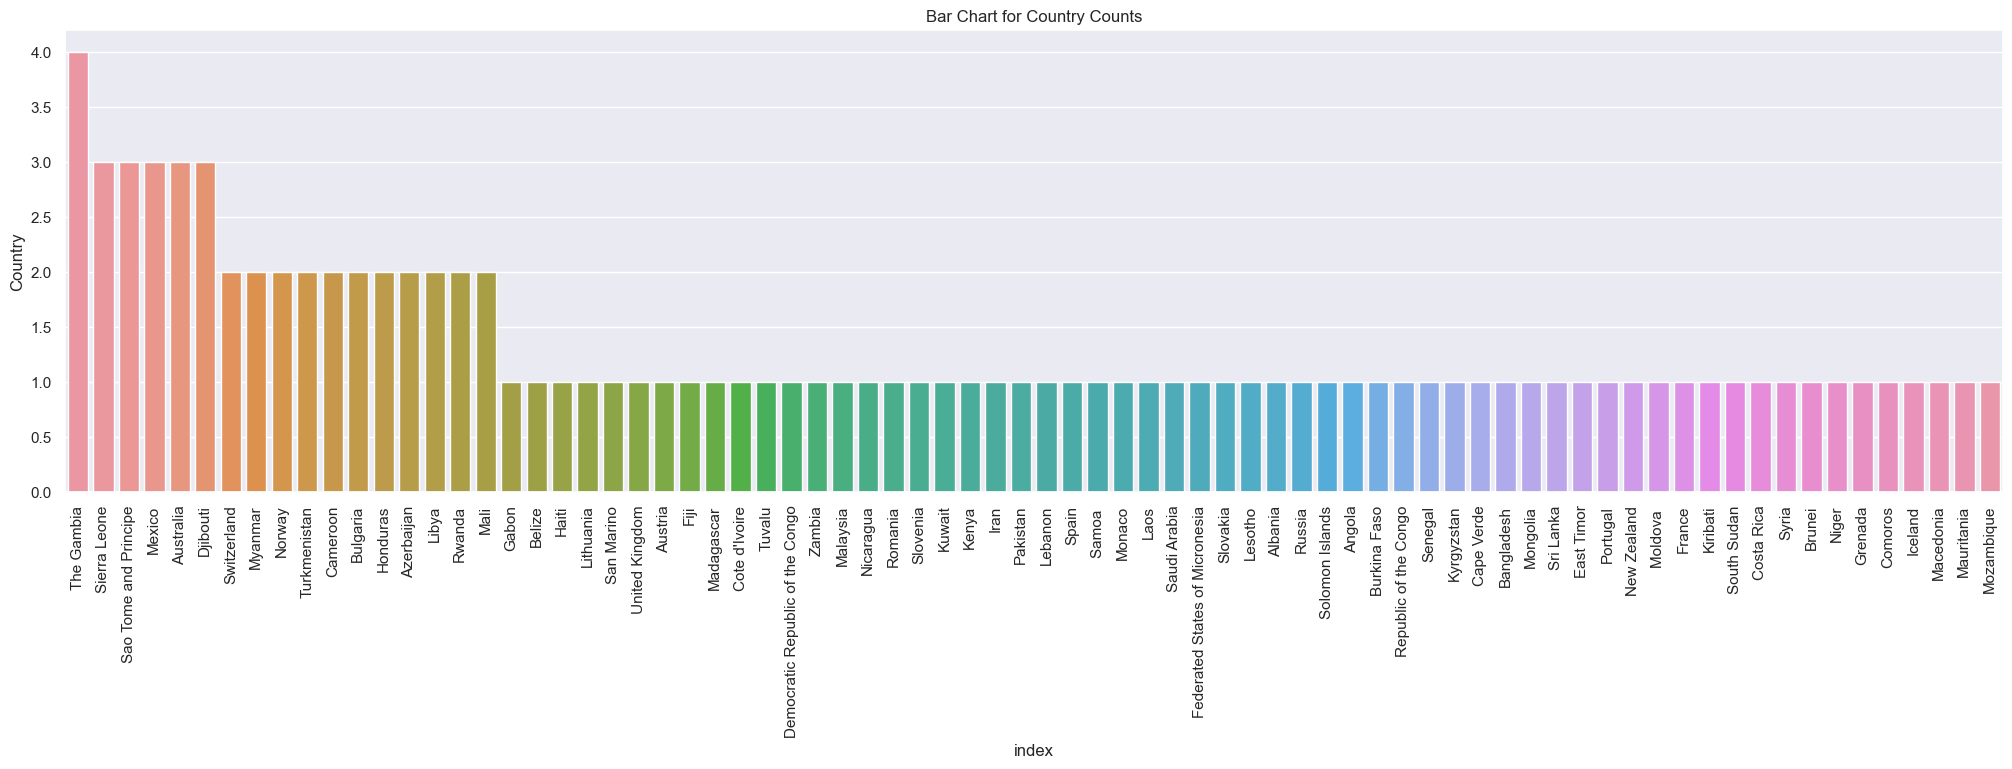

In [327]:
#create plot, ax object using plt.subplots

plot3,ax = plt.subplots(figsize=(25,6))

#  sns.barplot(x,y, data, ax) for plotting bar graphs

sns.barplot(x = 'index', y = 'Country', data = Countries_counts, ax = ax)
plt.xticks(rotation=90)
#  use ax object to change plot properties 

ax.set_title('Bar Chart for Country Counts')

#  set up seaborn style setting

sns.set()

# use plt.show() for showing the plots

plt.show()

Graph shows that The Gambia has multiple orders compared to rest of the countries, also many countries have only 1 order.

In [328]:
#For exact percentage we can redefine the dataframe 

Countries_counts = Countries_counts.loc[Countries_counts['Country'] > 1]

print('Number of countries having enteries > 1 are ' + str(Countries_counts.shape[0]) + '%')

Countries_counts

Number of countries having enteries > 1 are 17%


,index,Country
0,The Gambia,4
1,Sierra Leone,3
2,Sao Tome and Principe,3
3,Mexico,3
4,Australia,3
5,Djibouti,3
6,Switzerland,2
7,Myanmar,2
8,Norway,2
9,Turkmenistan,2


In [329]:
# Time based categorical variables Ship day  ,Order Date ,Ship Date
Ship_day = sales_data['Ship day'].value_counts().reset_index()

# print the dataframe formed

Ship_day

,index,Ship day
0,Saturday,22
1,Wednesday,18
2,Tuesday,15
3,Friday,14
4,Monday,13
5,Thursday,10
6,Sunday,8


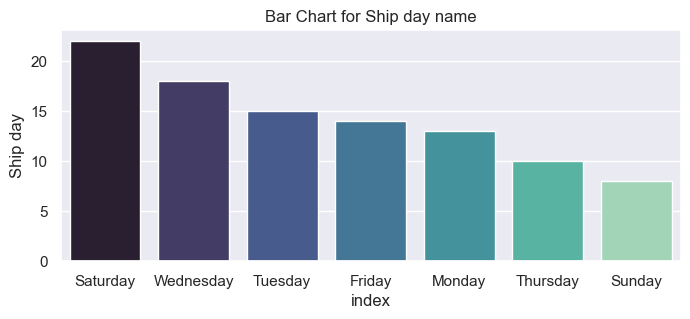

In [330]:
#  creating the Bar Chart
plot3,ax = plt.subplots(figsize=(8,3))

sns.barplot(x = 'index', y = 'Ship day', data = Ship_day, ax = ax, palette='mako')

ax.set_title('Bar Chart for Ship day name')

sns.set()

plt.show()

It can be seen in the graph that most of the orders are shipped on Saturday and Wednesday. Where highest is 22 orders on Saturday.

In [331]:
#Now we are having two date fields i.e. Order Date and Ship Date.  Finding the required sales trend using just only the Order Date
# Sales-trend -> month wise , year wise , yearly_month wise

#Hence, we will need to add 'Month' and 'Year' as new columns to the data set from the existing 'Order Date' fields

sales_data['Year'] = pd.DatetimeIndex(sales_data['Order Date']).year
sales_data['Month'] = pd.DatetimeIndex(sales_data['Order Date']).month
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration,Ship day,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30.0,Sunday,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24.0,Saturday,2012,8
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6.0,Thursday,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15.0,Saturday,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5.0,Wednesday,2013,2


In [332]:
# Converting month numbers into month names
sales_data['Month'] = pd.to_datetime(sales_data['Month'], format='%m').dt.month_name().str.slice(stop=3)
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration,Ship day,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30.0,Sunday,2010,May
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24.0,Saturday,2012,Aug
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6.0,Thursday,2014,May
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15.0,Saturday,2014,Jun
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5.0,Wednesday,2013,Feb


In [333]:
Year_count = sales_data['Year'].value_counts().reset_index()

Year_count

,index,Year
0,2012,22
1,2014,15
2,2013,12
3,2011,12
4,2015,11
5,2010,10
6,2016,10
7,2017,8


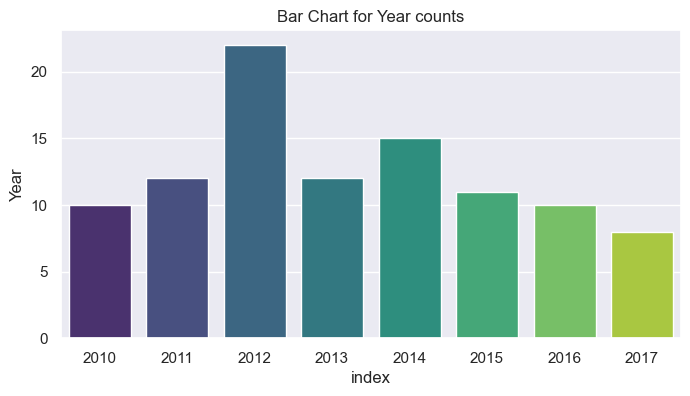

In [334]:
# we can make a bar chart for this representation 
plot4,ax = plt.subplots(figsize=(8,4))

sns.barplot(x = 'index', y = 'Year', data = Year_count, ax = ax,palette='viridis')

ax.set_title('Bar Chart for Year counts')

sns.set()

plt.show()

In [335]:
#For month analysis
Month_counts = sales_data['Month'].value_counts().reset_index()

Month_counts

,index,Month
0,Feb,13
1,Jul,12
2,May,11
3,Oct,11
4,Jun,10
5,Apr,9
6,Nov,9
7,Jan,7
8,Dec,5
9,Sep,5


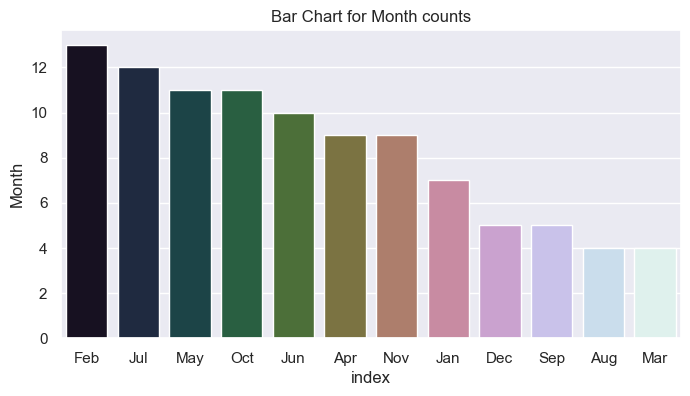

In [336]:
#plotting for month
plot4,ax = plt.subplots(figsize=(8,4))

sns.barplot(x = 'index', y = 'Month', data = Month_counts, ax = ax, palette='cubehelix')

ax.set_title('Bar Chart for Month counts')

sns.set()
plt.show()

It can be seen that most of the orders are in Feb with 13 orders and followed by july with 10 orders.

# Bivariate Analysis

In [337]:
# find out Sales-trend -> month wise , year wise , yearly_month wise
# We can explore the relationship of these with continous variables such as Total Profit , Units Sold
#Next we can find relationship of item types with: Unit Profit , Units Sold

#Total Profit vs Month
# applying groupby() function to group the data into month column

month_tp = sales_data.groupby(['Month'])

In [338]:
month_tp = month_tp.sum().reset_index() # Sum of month
# Sorting by month
month_tp = month_tp.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)
month_tp


,Month,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration,Year
4,Jan,35742,2718.95,2059.80,10482467.12,7665610.10,2816857.02,148.0,14095
3,Feb,71079,4496.69,3178.91,24740517.77,17668467.26,7072050.51,236.0,26172
7,Mar,14497,647.19,381.82,2274823.87,1346472.81,928351.06,71.0,8058
0,Apr,44680,2888.93,2043.29,16187186.33,11426977.98,4760208.35,231.0,18118
8,May,63651,2948.46,2038.25,13215739.99,8633047.69,4582692.30,210.0,22150
6,Jun,34893,2006.48,1276.50,5230325.77,3044946.34,2185379.43,208.0,20129
5,Jul,76201,2264.28,1446.97,15669518.50,10091055.44,5578463.06,297.0,24162
1,Aug,17251,333.64,166.79,1128164.91,548888.24,579276.67,119.0,8054
11,Sep,30101,719.20,403.94,5314762.56,2970596.53,2344166.03,154.0,10062
10,Oct,55472,3321.94,2312.23,15287576.61,10780653.36,4506923.25,335.0,22143


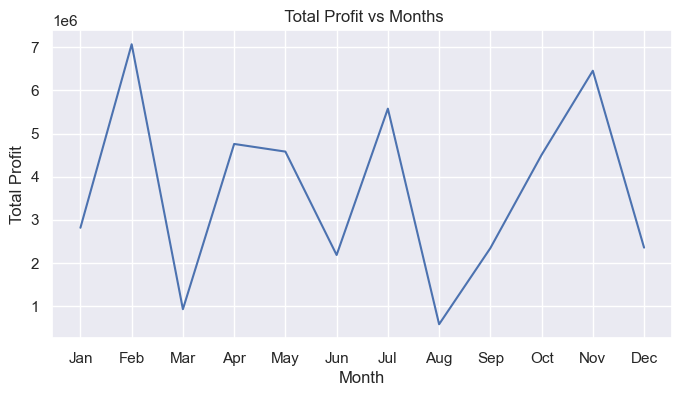

In [341]:
# Plotting by line graph to understand time frame

plot5, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x = month_tp['Month'],y = month_tp['Total Profit'], data = month_tp, ax = ax)

ax.set_title(' Total Profit vs Months')

plt.show()

From Line graph we can say that maximum total profit appears in months Feb and Nov , and least in Mar and Aug.

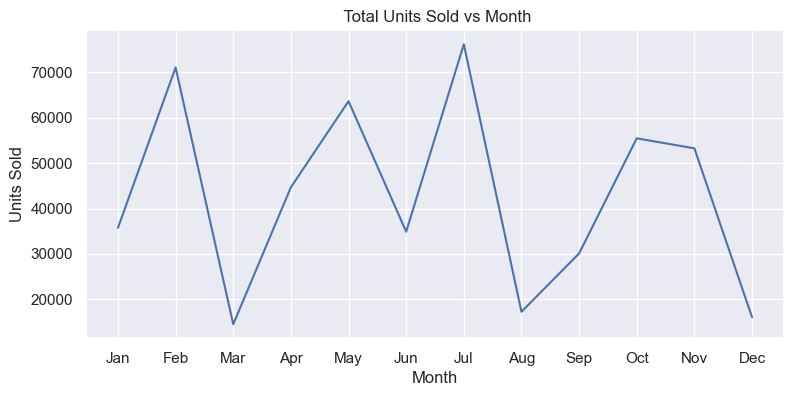

In [342]:
##Units Sold vs Month
# plot units sold vs month using the same dataframe

plot6, ax = plt.subplots(figsize=(9,4))

sns.lineplot(x = month_tp['Month'],y = month_tp['Units Sold'], data = month_tp, ax = ax)

ax.set_title(' Total Units Sold vs Month')

plt.show()

We can see highest units sold are in Jul month followed by Feb, and least in Aug, March and Dec



Sales trend using 'Year' column

In [343]:
# applying groupby() function to group the data into month column

year_tp = sales_data.groupby(['Year'])

year_tp = year_tp.sum().reset_index()

year_tp

,Year,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration
0,2010,61571,2868.06,1884.69,19186024.92,12556457.49,6629567.43,259.0
1,2011,54768,2701.68,1976.81,11129166.07,8388157.84,2741008.23,304.0
2,2012,97967,7766.50,5632.23,31898644.52,22685634.40,9213010.12,491.0
3,2013,64663,3818.29,2567.39,20330448.66,13615028.62,6715420.04,300.0
4,2014,92040,2943.57,1971.26,16630214.43,10750752.75,5879461.68,341.0
5,2015,49480,2706.04,1833.40,12427982.86,8431443.42,3996539.44,283.0
6,2016,43156,2713.61,1744.73,12372867.22,7469029.21,4903838.01,225.0
7,2017,49226,2158.38,1494.29,13373419.63,9284066.18,4089353.45,133.0


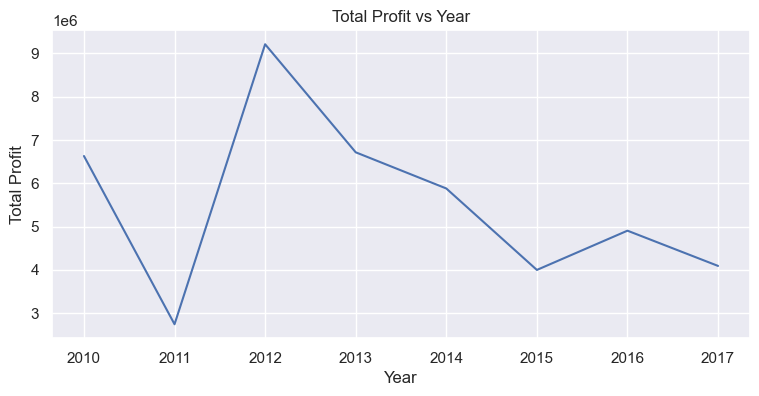

In [344]:
#Plotting line graph for year profit
plot7, ax = plt.subplots(figsize=(9,4))

sns.lineplot(x = year_tp['Year'],y = year_tp['Total Profit'], data = year_tp, ax = ax)

ax.set_title('Total Profit vs Year')

plt.show()

The total profit is maximum for year 2012 and least in 2011

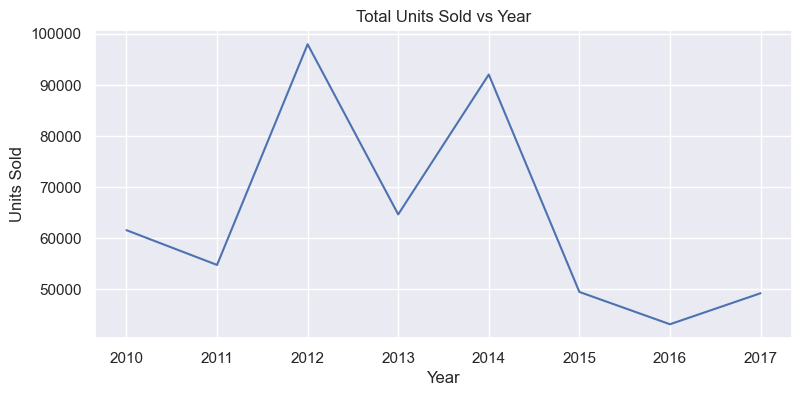

In [345]:
#Units Sold vs Year
plot8, ax = plt.subplots(figsize=(9,4))

sns.lineplot(x = year_tp['Year'],y = year_tp['Units Sold'], data = year_tp, ax = ax)

ax.set_title('Total Units Sold vs Year')

plt.show()

At years 2012 and next at 2014 we saw it has been peaked for sold items.

In [346]:
#Total Profit vs Item type
# applying groupby() function to group the data into Item Type column

itemtype = sales_data.groupby(['Item Type'])

# now we need to find the sum of other feilds to make the comparison

itemtype = itemtype.sum().reset_index()

itemtype

,Item Type,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping duration,Year
0,Baby Food,40545,1786.96,1115.94,10350327.60,6463683.90,3886643.70,180.0,14093
1,Beverages,56708,379.60,254.32,2690794.60,1802747.32,888047.28,180.0,16106
2,Cereal,25877,1439.90,819.77,5322898.90,3030455.47,2292443.43,152.0,14097
3,Clothes,71260,1420.64,465.92,7787292.80,2553958.40,5233334.40,389.0,26168
4,Cosmetics,83718,5683.60,3423.29,36601509.60,22045460.94,14556048.66,305.0,26178
5,Fruits,49998,93.30,69.20,466481.34,345986.16,120495.18,263.0,20127
6,Household,44727,6014.43,4522.86,29889712.29,22477106.58,7412605.71,209.0,18115
7,Meat,10675,843.78,729.38,4503675.75,3893065.75,610610.00,51.0,4029
8,Office Supplies,46967,7814.52,6299.52,30585380.07,24655796.32,5929583.75,241.0,24151
9,Personal Care,48708,817.30,566.70,3980904.84,2760282.36,1220622.48,190.0,20141


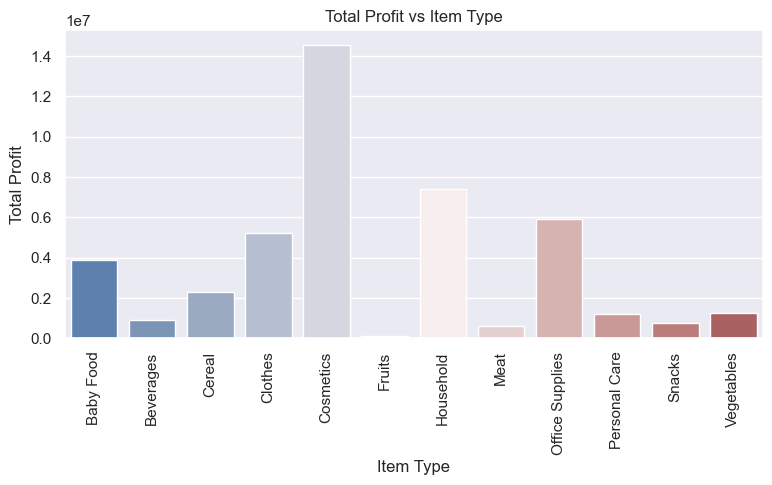

In [349]:
plot9, ax = plt.subplots(figsize=(9,4))

sns.barplot(x = itemtype['Item Type'],y = itemtype['Total Profit'], data = itemtype, ax = ax, palette='vlag')
plt.xticks(rotation=90)

ax.set_title('Total Profit vs Item Type')

plt.show()

Maximum profit is obtained from cosmetics and minimum with food items such as Fruits, beverages and meat.

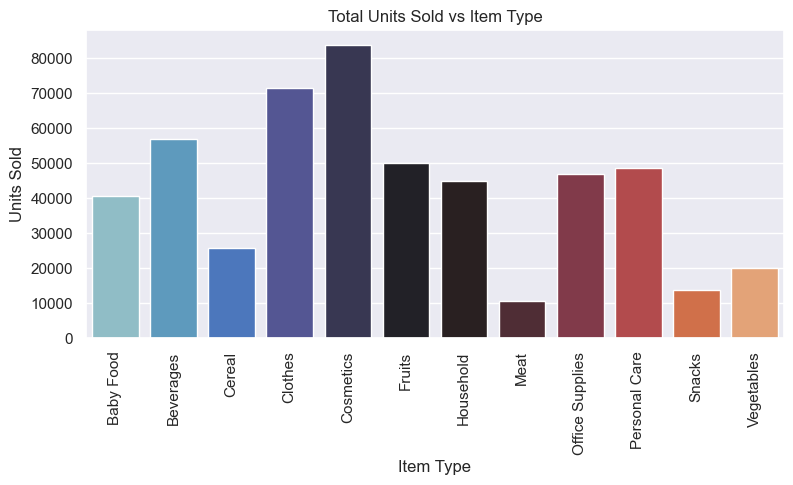

In [352]:
#Units Sold vs Item type
plot10, ax = plt.subplots(figsize=(9,4))

sns.barplot(x = itemtype['Item Type'],y = itemtype['Units Sold'], data = itemtype, ax = ax, palette='icefire')
plt.xticks(rotation=90)

ax.set_title('Total Units Sold vs Item Type')

plt.show()

Here we can see Clothes and Cosmetics have the maximum units sold and meat is minimum

#### Final results from EDA

# Here are the insights derived from the above analysis for better business sales:

### The Unit Price of the product sold are mostly under 180 dollars as shown in the box plot median values, also there are no outliers that are shown. Highest price of the product is shown as 668.27 dollars .

### Most of the unit cost is within 107 dollars also as shown witnh the help of respective median values and there are no outliers that can be seen in box plot. The max value is 525 dollarsmin the unit cost.

#### Total Profit -
.As indicated by the median value, the majority of the Total Profit values fall within 2.9e+05 dollars. 

.We can observe that there are more than three outliers in this column from the box plot.

.February and November have the highest total profit, while March and August show the lowest.

.Additionally, the overall profit is lowest in 2011 and highest in 2012.
 
. Additionally, the most profit is made from cosmetics, while the lowest profit is made from food products including   fruits, drinks, and meat
 
#### Units Sold -
.The median number indicates that the majority of the sold units are within the range of 5383 units. Box plots allow us to confirm once more that there are no outliers, with a maximum of 9925 units sold and a minimum of 124 units.

.As we can see, July has the most unit sales, followed by February, while August, March, and December have the lowest.

.The highest number of units were sold in 2012 and again in 2014.

.Meat sales are minimal, whereas clothing and cosmetics have the highest unit sales.
         
         
#### Shipping Duration- The median shipping time figure indicates that the majority of values fall inside a 24-day window, and the data variation or spread is also less. There are obviously no outliers in this data; the largest and lowest numbers are 50 and 0 days, respectively.

#### Item Type - Most of the item types which have higher of large categories are Clothes, Cosmetics and Office Supplies

#### Region - The most common regions are Sub-Saharan Africa (37) and Europe (24).

#### Shipping day - Most of the shipping is happening on Saturdays and Wednesdays comparatively least on Sundays